In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class Kampus:
    maskimal_gedung = 4000
    def __init__(self,nama_kampus,prodi):
        self.nama_kampus = nama_kampus
        self.prodi = prodi
        self.anggaran = 0
        self.pengeluaran = 0
        self.dosen = 0
    
    def tambahAnggaran(self,pemasukan):
        self.anggaran += pemasukan
        
    def tambahPengeluaran(self,pengeluaran):
        self.pengeluaran += pengeluaran
        

class Mahasiswa:
    def __init__(self,id,prodi,angkatan):
        self.id = id
        self.prodi = prodi
        self.angkatan = angkatan
        
class Prodi:
    def __init__(self,namaProdi,UKT,kodeProdi):
        self.mahasiswa = []
        self.nama_prodi = namaProdi
        self.kodeProdi = kodeProdi
        self.angkatan = []
        self.kelas = []
        self.UKT = UKT
        self.dosen = 0
        
    def tambah_kelas(self,nama_kelas):
        self.kelas.append(nama_kelas)
    
    def tambah_angkatan(self,tahunAngkatan):
        self.angkatan.append(tahunAngkatan)
        
    def tambah_mahasiswa(self,mahasiswa):
        self.mahasiswa.append(mahasiswa)
        self.angkatan[(self.angkatan).index(mahasiswa.angkatan)].append(mahasiswa)
        

class Kelas:
    def __init__(self,nama_kelas):
        self.nama_kelas = nama_kelas
        self.mahasiswa = []
        
    def tambahMahasiswa(self,namaMahasiswa):
        self.mahasiswa.append(namaMahasiswa)

In [3]:
prodi = [Prodi("Informatika",7000000,"IF"),
         Prodi("Sistem Informasi",8000000,"SI"),
         Prodi("Teknologi Indormasi",8000000,"TI"),
         Prodi("Rekayasa Perangkat Lunak",8500000,"RPL"),
         Prodi("Sains Data",7000000,"DS")]

In [4]:
ITTelkom = Kampus("ITTelkom Surabaya",prodi)

In [5]:
def hitungMahasiswa(prodi):
    total = 0
    for i in prodi:
        total += len(i.mahasiswa)
    return total

In [6]:
def pembagianKelas(prodi,angkatan):
    for program_studi in prodi:
        total_mahasiswa = len(program_studi.mahasiswa)
        kelas = total_mahasiswa // 30
        program_studi.angkatan.append([angkatan])
        
        program_studi.dosen += total_mahasiswa // 40
        ITTelkom.dosen += program_studi.dosen
        
        # Buat Kelas
        for i in range(1,kelas + 1):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{i}"))
        
        for x in program_studi.kelas:
            for i in range(30):
                x.tambahMahasiswa(program_studi.mahasiswa[i])
        
        # Pembagian
        if kelas * 30 < len(program_studi.mahasiswa):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{kelas+ 1}"))
            for i in range(kelas * 30 + 1, len(program_studi.mahasiswa)):
                program_studi.kelas[-1].tambahMahasiswa(program_studi.mahasiswa[i])

In [7]:
def simulasiKampus(tahunStart,tahunTerakhir):
    a = 0
    angkatan = tahunStart
    growth_factor = 1.02
    mahasiswa = random.randint(1,100)
    cashFlowKampus = []
    for tahun in range(tahunTerakhir - tahunStart):
        for i in prodi:
            i.angkatan.append(angkatan)
        for bulan in range(1,12 + 1):    
            # MAHASISWA AKTIF
            if(bulan == 2 or bulan == 11):
                for i in prodi:
                    ITTelkom.tambahAnggaran(len(i.mahasiswa) * i.UKT)
                    
            # PENDAFTARAN
            for _ in range(30): 
                if random.random() < 0.5:
                    mahasiswa += int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                else:
                    mahasiswa -= int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                for _ in range(random.randint(1,mahasiswa)):
                    BiayaUP3 = 8000000
                    BiaySDP = 12150000
                    if hitungMahasiswa(prodi) == 600:
                        break 
                    if random.random() < 0.5:
                        prodiID = random.randint(0, 4)
                        a += 1
                        prodi[prodiID].tambah_mahasiswa(Mahasiswa(a, prodi[prodiID], angkatan))
                        ITTelkom.tambahAnggaran(BiayaUP3 + BiaySDP + prodi[prodiID].UKT) 
                        
            # CASH FLOW
            gajiDosen = 7000000 * ITTelkom.dosen
            pengeluaran = 0.7 * ITTelkom.anggaran / 12  + gajiDosen
            if bulan == 12:
                pengeluaran += 2000000000
            ITTelkom.pengeluaran = pengeluaran
            cashflow = ITTelkom.anggaran - pengeluaran
            cashFlowKampus.append([angkatan,bulan,ITTelkom.anggaran,ITTelkom.pengeluaran,cashflow]) 
            ITTelkom.anggaran -= pengeluaran           
        
        # PEMBAGIAN KELAS
        pembagianKelas(prodi,angkatan)  
        angkatan += 1
        
    return cashFlowKampus

In [8]:
result = simulasiKampus(2021,2025)

AttributeError: 'int' object has no attribute 'append'

In [ ]:
columns = ['tahun', 'bulan', 'pemasukan', 'pengeluaran', 'cashflow']
df = pd.DataFrame(result, columns=columns)
dfeachYear = []

tahuncolumns = df.tahun.unique().tolist()

for i in tahuncolumns:
    dfeachYear.append(df.loc[df.tahun == i])

In [ ]:
dfeachYear

[    tahun  bulan     pemasukan   pengeluaran      cashflow
 0    2021      1  2.279300e+09  1.329592e+08  2.146341e+09
 1    2021      2  3.996441e+09  2.331257e+08  3.763315e+09
 2    2021      3  4.521365e+09  2.637463e+08  4.257619e+09
 3    2021      4  5.063469e+09  2.953690e+08  4.768100e+09
 4    2021      5  5.404550e+09  3.152654e+08  5.089284e+09
 5    2021      6  5.452234e+09  3.180470e+08  5.134187e+09
 6    2021      7  5.498137e+09  3.207247e+08  5.177413e+09
 7    2021      8  5.624813e+09  3.281141e+08  5.296699e+09
 8    2021      9  5.626499e+09  3.282124e+08  5.298286e+09
 9    2021     10  5.829636e+09  3.400621e+08  5.489574e+09
 10   2021     11  8.095124e+09  4.722156e+08  7.622909e+09
 11   2021     12  7.983859e+09  2.465725e+09  5.518133e+09,
     tahun  bulan     pemasukan   pengeluaran      cashflow
 12   2022      1  5.821283e+09  3.745749e+08  5.446709e+09
 13   2022      2  8.276309e+09  5.177847e+08  7.758524e+09
 14   2022      3  8.061674e+09  5.0526

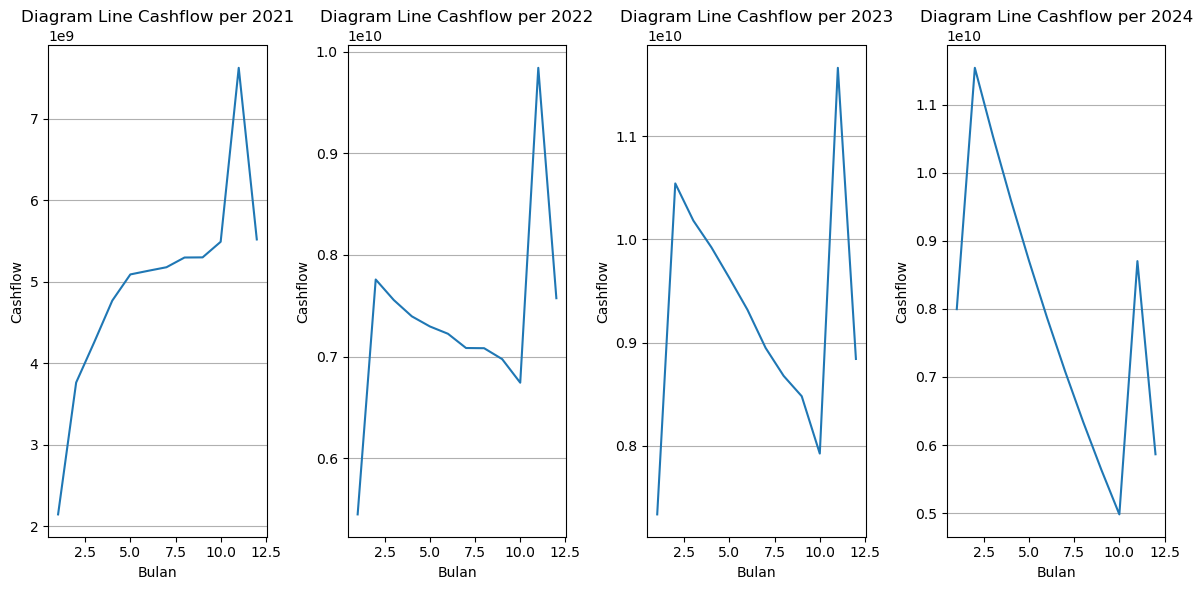

In [ ]:
plt.figure(figsize=(12, 6))  # Ukuran gambar secara horizontal
plt.subplot(1, 4, 1)
plt.plot(dfeachYear[0].bulan,dfeachYear[0].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2021')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 2)
plt.plot(dfeachYear[1].bulan,dfeachYear[1].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2022')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 3)
plt.plot(dfeachYear[2].bulan,dfeachYear[2].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2023')
plt.grid(axis='y')
plt.tight_layout()

plt.subplot(1, 4, 4)
plt.plot(dfeachYear[3].bulan,dfeachYear[3].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2024')
plt.grid(axis='y')
plt.tight_layout()

plt.show()